# Target simulator

In [1]:
# Auto reload
%reload_ext autoreload
%autoreload 2
#%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import utils
import TargetSimulator as sim

### Simple lines

Main(mode) is a wrapper calling simulate_episodes() with pre-defined arguments determind by mode.

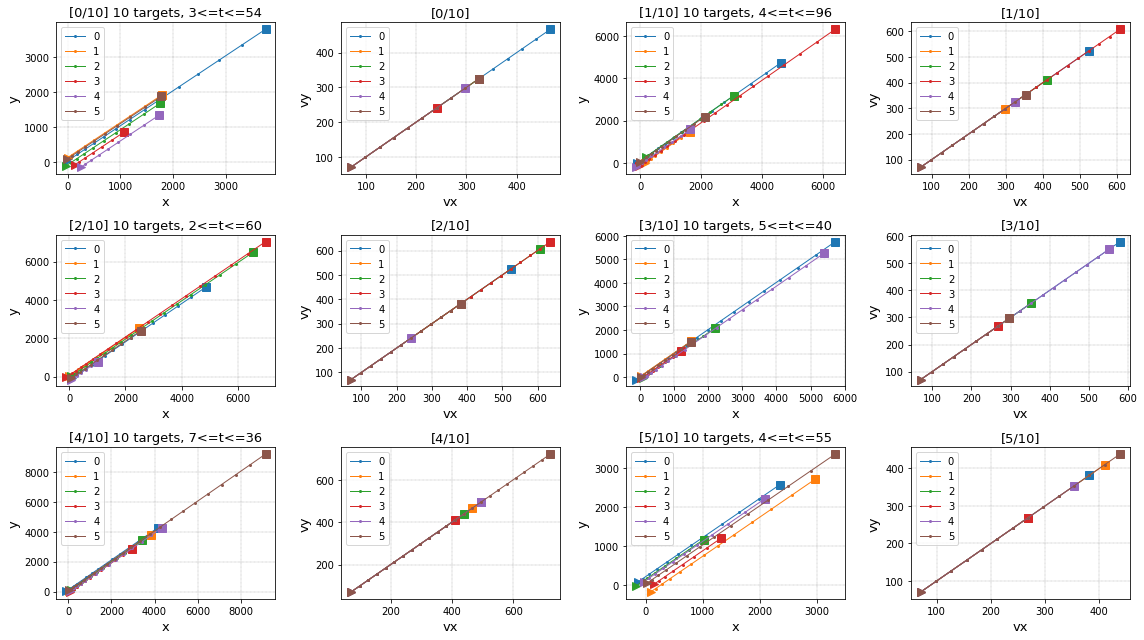

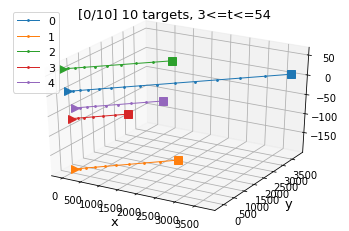

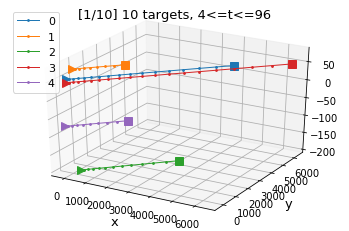

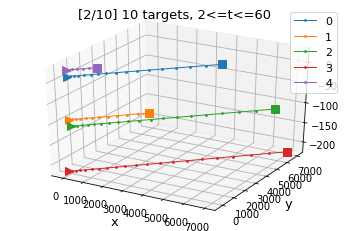

In [3]:
dd, targets, target_args = sim.main(1)

Meta-data: table of targets (in episodes, in scenarios).

In [4]:
dd

,scenario,episode,target,seed_ep,seed_target,t0,T,group
0,line,0,0,0,209652396,40,14.0,0
1,line,0,1,0,75171231,27,9.0,0
2,line,0,2,0,1391445412,28,9.0,0
3,line,0,3,0,526896879,15,6.0,0
4,line,0,4,0,430198340,11,8.0,0
...,...,...,...,...,...,...,...,...
5,line,9,5,9,844439032,12,18.0,0
6,line,9,6,9,857584319,12,10.0,0
7,line,9,7,9,1578419368,10,20.0,0
8,line,9,8,9,1964306408,29,16.0,0


`target_args[episode][target]` contains the random parameters that were drawn for the target and determined its trajectory.
It mostly contains initial state params, number of turns, and params for every turn and straight interval.

In [5]:
target_args

[[{'seed': 209652396,
   't0': 40,
   'X0': array([-1.48906614e+01,  3.10133610e+01,  5.38279708e+00,  7.07106781e+01,
           7.07106781e+01,  6.12323400e-15]),
   'n_turns': 0,
   'intervals': [(<function TargetSimulator.line(t0, dt, X0, acc, duration, theta=None, phi=None)>,
     {'acc': 40, 'duration': 14.465044280294073})],
   'tf': 54.0,
   'T': 14.0},
  {'seed': 75171231,
   't0': 27,
   'X0': array([-2.18600435e+00,  1.34598301e+02, -1.97940071e+02,  7.07106781e+01,
           7.07106781e+01,  6.12323400e-15]),
   'n_turns': 0,
   'intervals': [(<function TargetSimulator.line(t0, dt, X0, acc, duration, theta=None, phi=None)>,
     {'acc': 40, 'duration': 9.502196188218434})],
   'tf': 36.0,
   'T': 9.0},
  {'seed': 1391445412,
   't0': 28,
   'X0': array([-2.51720758e+01, -9.25570147e+01,  6.37929095e+01,  7.07106781e+01,
           7.07106781e+01,  6.12323400e-15]),
   'n_turns': 0,
   'intervals': [(<function TargetSimulator.line(t0, dt, X0, acc, duration, theta=None, phi=

`targets[episode][target]` contains the actual trajectory data. `x_*` are state variables. `phase` is the index of trajectory phase (should be straight lines and turns alternately).

In [6]:
targets[0][0]

,t,x_x,x_y,x_z,x_vx,x_vy,x_vz,phase
0,40.0,-14.890661,31.013361,5.382797,70.710678,70.710678,6.123234e-15,0
1,41.0,69.962152,115.866175,5.382797,98.994949,98.994949,8.572528e-15,0
2,42.0,183.099237,229.003260,5.382797,127.279221,127.279221,1.102182e-14,0
3,43.0,324.520594,370.424616,5.382797,155.563492,155.563492,1.347111e-14,0
4,44.0,494.226221,540.130243,5.382797,183.847763,183.847763,1.592041e-14,0
5,45.0,692.216120,738.120142,5.382797,212.132034,212.132034,1.836970e-14,0
6,46.0,918.490290,964.394312,5.382797,240.416306,240.416306,2.081900e-14,0
7,47.0,1173.048731,1218.952753,5.382797,268.700577,268.700577,2.326829e-14,0
8,48.0,1455.891443,1501.795466,5.382797,296.984848,296.984848,2.571758e-14,0
9,49.0,1767.018427,1812.922450,5.382797,325.269119,325.269119,2.816688e-14,0


### Few-turns trajectories

Random number (around 2) of turns, each of random angle (around 45 degrees) to a random direction.

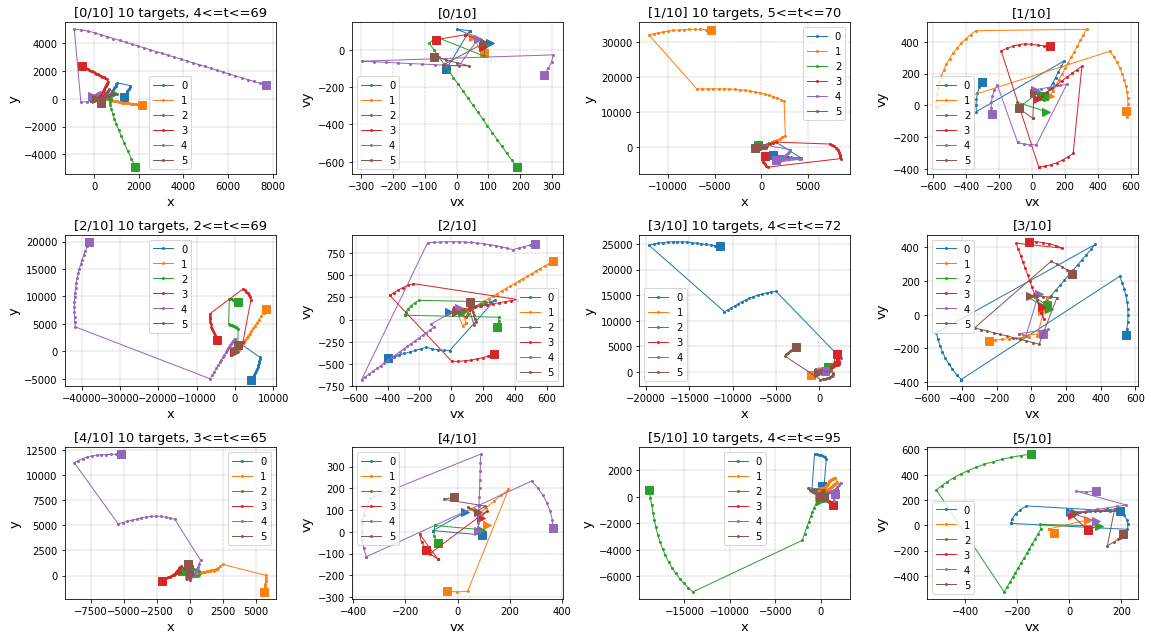

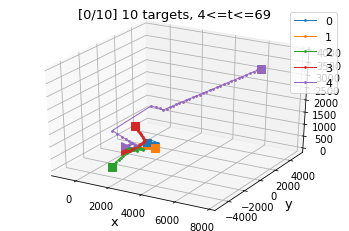

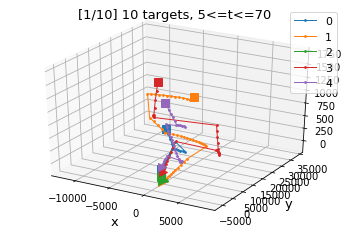

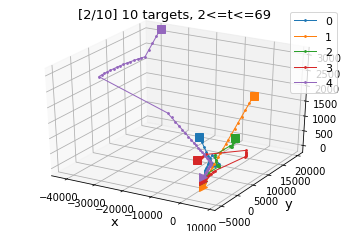

In [7]:
d, targets, target_args = sim.main(2)
dd = pd.concat((dd,d))

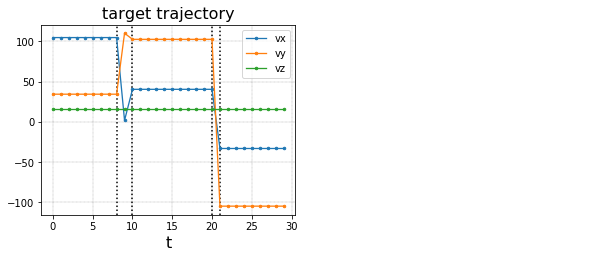

In [8]:
axs = sim.show_target(targets[0][0], scope='velocity')

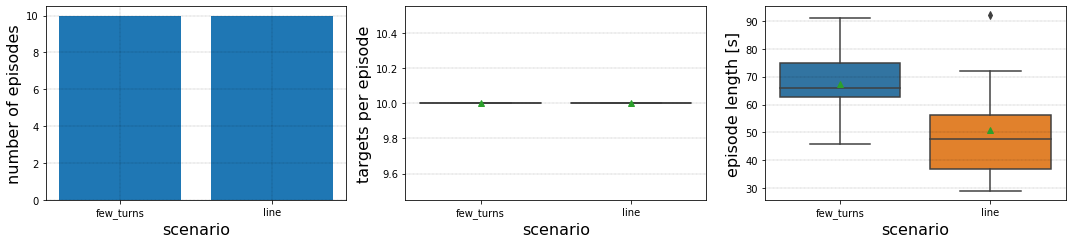

In [9]:
axs = sim.scenarios_summary(dd)

In [10]:
mm = sim.meta_targets2episodes(dd)
mm

,scenario,episode,n_targets,seed,Ti,Tf,T,group
0,few_turns,0,10,0,4,69.0,65.0,0
1,few_turns,1,10,1,5,70.0,65.0,0
2,few_turns,2,10,2,2,69.0,67.0,0
3,few_turns,3,10,3,4,72.0,68.0,0
4,few_turns,4,10,4,3,65.0,62.0,0
5,few_turns,5,10,5,4,95.0,91.0,0
6,few_turns,6,10,6,2,48.0,46.0,0
7,few_turns,7,10,7,6,83.0,77.0,0
8,few_turns,8,10,8,3,85.0,82.0,0
9,few_turns,9,10,9,6,55.0,49.0,0
